In [102]:
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Upload zipped data folder, names MUST match
zip_name = 'data'  # define zipped folder name

with zipfile.ZipFile(f'{zip_name}.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [105]:
adj_list = dict()

for root,_,files in os.walk(os.path.abspath(zip_name)):
    for csv_file in files:
        df = pd.read_csv(os.path.join(root,csv_file))
        authors = df['author']
        for author in authors:  # Init empty vertices
            if not adj_list.get(author):
               adj_list[author] = []

        for i, author in enumerate(authors):  # Add Edges
            for _author in authors[i:]:
                adj_list[author].append(_author)
                adj_list[_author].append(author)

adj_list

{'Lean': ['Lean', 'Lean', 'Elmo Elmerson', 'RED', 'Egg Mon', 'A K', 'LTB'],
 'Elmo Elmerson': ['Lean',
  'Elmo Elmerson',
  'Elmo Elmerson',
  'RED',
  'Egg Mon',
  'A K',
  'LTB'],
 'RED': ['Lean', 'Elmo Elmerson', 'RED', 'RED', 'Egg Mon', 'A K', 'LTB'],
 'Egg Mon': ['Lean',
  'Elmo Elmerson',
  'RED',
  'Egg Mon',
  'Egg Mon',
  'A K',
  'LTB'],
 'A K': ['Lean', 'Elmo Elmerson', 'RED', 'Egg Mon', 'A K', 'A K', 'LTB'],
 'LTB': ['Lean', 'Elmo Elmerson', 'RED', 'Egg Mon', 'A K', 'LTB', 'LTB'],
 'Zaza': ['Zaza',
  'Zaza',
  'Jannes Przywari',
  'M HR',
  'Chad',
  'Haylash',
  'Kollington',
  'Just Some Guy 1'],
 'Jannes Przywari': ['Zaza',
  'Jannes Przywari',
  'Jannes Przywari',
  'M HR',
  'Chad',
  'Haylash',
  'Kollington',
  'Just Some Guy 1'],
 'M HR': ['Zaza',
  'Jannes Przywari',
  'M HR',
  'M HR',
  'Chad',
  'Haylash',
  'Kollington',
  'Just Some Guy 1'],
 'Chad': ['Zaza',
  'Jannes Przywari',
  'M HR',
  'Chad',
  'Chad',
  'Haylash',
  'Kollington',
  'Just Some Guy 1'],


In [106]:
sorted_keys = sorted([k for k in adj_list.keys()], key=lambda k: len(adj_list[k]))[::-1]
sorted_keys

['Just Some Guy 1',
 'Kollington',
 'Haylash',
 'Chad',
 'M HR',
 'Jannes Przywari',
 'Zaza',
 'LTB',
 'A K',
 'Egg Mon',
 'RED',
 'Elmo Elmerson',
 'Lean']

In [107]:
def eval_cell(a,b):
    return (a == b) + (b in adj_list[a])

adj_mat = [[eval_cell(k,_k) for _k in sorted_keys] for k in sorted_keys]
adj_mat

[[2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2]]

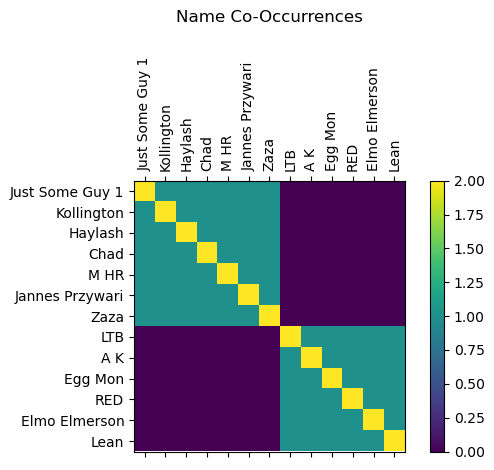

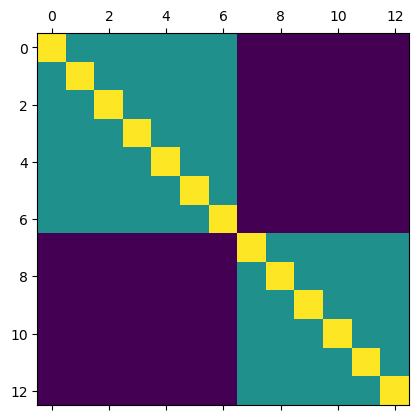

In [108]:
# https://stackoverflow.com/questions/55289921/matplotlib-matshow-xtick-labels-on-top-and-bottom
label_range = np.arange(len(sorted_keys))

fig = plt.figure()
ax = plt.gca()

im = ax.matshow(adj_mat, interpolation='none')
fig.colorbar(im)

ax.set_xticks(label_range)
ax.set_xticklabels(sorted_keys)
ax.set_yticks(label_range)
ax.set_yticklabels(sorted_keys)

plt.xticks(label_range,sorted_keys)
plt.yticks(label_range,sorted_keys)
plt.matshow(adj_mat)

ax.tick_params(axis="x",  top=True,  labeltop=True)
plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=90,
         ha="left", va="center",rotation_mode="anchor")

ax.set_title("Name Co-Occurrences", pad=25)
fig.tight_layout()
fig.savefig('adj_matrix.png')
plt.show()
# Download saved image